# Virat Kohli : Batting Analysis (2008-2018): EDA
**Virat Kohli** is an Indian cricketer. He was born in Delhi, India on November 5, 1988. Virat is the first player in ICC cricket history to win all 3 ICC awards in a single year- ICC ODI player of the year, ICC Test player of the year and ICC Player of the year award in 2018.


**Born**: November 5, 1988, Delhi, India

**Team**: India national cricket team

**Sport**: Cricket

**Nationality**: India

**Data Dictionary**
1. RunsScored : This is the total number of runs (points) Virat Kohli scored in a match. In cricket, runs are scored when the batter (like Kohli) successfully hits the ball and runs to the opposite end of the pitch, or when the ball reaches the boundary for an automatic 4 or 6 runs. 
2. BallsFaced :  Cricket matches are played with a bowler delivering the ball to the batter. The number of "balls faced" is a count of how many times Virat Kohli received the ball from the bowler during his turn to bat. Each ball is an opportunity to score runs.
3. BattingPosition : This refers to the order in which a player comes out to bat for their team. The first two batters are called the "openers" and face the initial deliveries. The batting position (1st, 2nd, 3rd, etc.) is significant because the earlier a player comes in, the longer they could potentially stay on the field and score runs.
4. Dismissal : A batter is dismissed when they are no longer allowed to continue batting, which can happen in several ways

5. Inning : In cricket, an inning is the portion of the match where one team gets its turn to bat and score runs. There can be one or two innings for each team, depending on the format of the game.
6. Opposition : This is the opposing team that Virat Kohli’s team is playing against. For example, India (Virat Kohli's team) might be playing against Australia or England.
7. Year : The year helps identify when the match took place. It is useful for analyzing performance over time, like how Kohli’s form has changed across different years.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [4]:
# Reading the Batsman dataset
mydata = pd.read_csv('Batsman.csv')

In [7]:
bright_contrasting_pastels = [
    '#FAD02E', '#F28D35', '#D83367', '#B24D9D', '#9B9B77',  # Warm pastels
    '#7E9F6B', '#66C5CC', '#54A0FF', '#4B77BE', '#AF7AC5',  # Cool pastels
    '#F9B1BC', '#C4E17F', '#E1C6A0', '#9BDFD1', '#E6A7B1',  # Mixed pastels
    '#F4E1D2', '#D1F5E2', '#B0BCC8'                        # Soft contrasts
]

very_bright_contrasting = [
    '#FF5733', '#FFBD33', '#28B463', '#1F77B4', '#D83F5F',  # Bold oranges, yellows, greens
    '#C71585', '#7B68EE', '#00CED1', '#FFD700', '#FF4500',  # Bright pinks, blues, and greens
    '#4B0082', '#FF6347', '#98FB98', '#ADFF2F', '#FF69B4',  # Bright purples, reds, and greens
    '#FF1493', '#B22222', '#F0E68C'                         # Bright pink, red, and yellow
]

neon_red_yellow_palette = [
    '#FF00FF', '#00FFFF', '#FFFF00', '#FF0000', '#FF8C00',  # Neon pink, cyan, yellow, red, and orange
    '#FF1493', '#FF4500', '#FFD700', '#FF6347', '#FF69B4',  # Bright pink, red, yellow, and orange
    '#32CD32', '#00FA9A', '#ADFF2F', '#F0E68C', '#FFB6C1',  # Neon greens and yellows
    '#4B0082', '#8A2BE2', '#00FF7F', '#7FFF00', '#FF4500'   # Bright purples, greens, and oranges
]

In [9]:
# First 5 rows
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [11]:
# last 5 rows
mydata.tail()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
203,140,107,3,Stumped,2,West Indies,2018
204,157,129,3,NO,1,West Indies,2018
205,107,119,3,Bowled,2,West Indies,2018
206,16,17,3,Caught,1,West Indies,2018
207,33,29,3,NO,2,West Indies,2018


In [27]:
mydata.sample(10)

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
200,75,82,3,Stumped,2,England,2018
169,8,5,3,Caught,1,England,2017
72,77,94,3,Run out,2,Sri Lanka,2012
63,35,30,4,LBW,2,England,2011
157,7,6,3,Caught,2,South Africa,2015
68,20,30,4,LBW,2,West Indies,2011
146,44,42,3,NO,2,Ireland,2015
191,121,125,3,Caught,1,New Zealand,2017
100,11,21,3,Caught,1,West Indies,2013
41,2,6,3,Caught,2,South Africa,2011


In [29]:
#Checking Info
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [31]:
#Shape of the data
mydata.shape

(208, 7)

In [33]:
#Null Value Check
mydata.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [35]:
# Descriptive summary
mydata.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [37]:
# Descriptive summary for Numeric and Categorical variables
mydata.describe(include="all")

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


In [41]:
sns.set_palette(very_bright_contrasting)

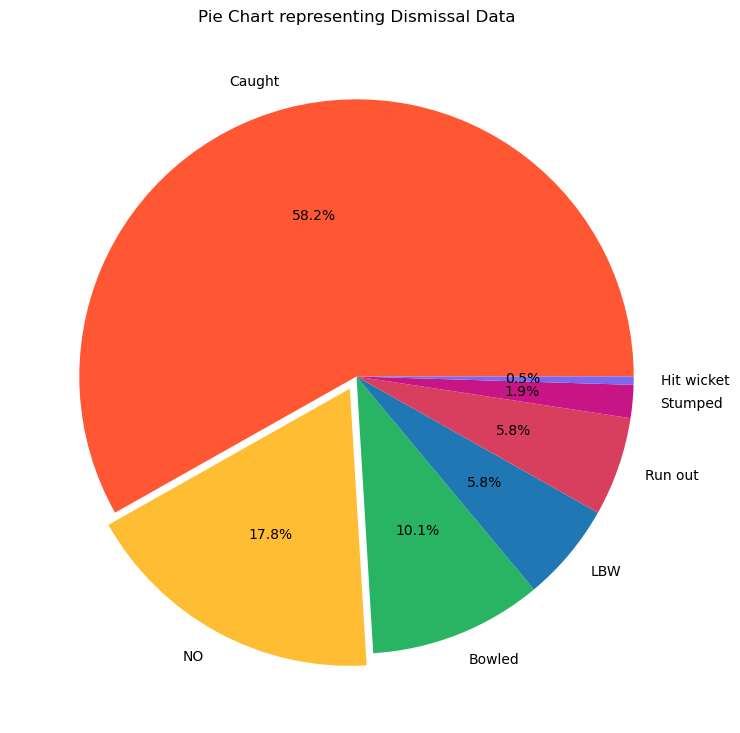

In [43]:
plt.figure(figsize=(9,9))
plt.pie(mydata["Dismissal"].value_counts(),labels=mydata["Dismissal"].value_counts().index,autopct='%1.1f%%',explode = (0, 0.05, 0, 0,0,0,0))
plt.title(label = 'Pie Chart representing Dismissal Data')
plt.show()

##### Virat Kohli is mostly dismissed by being caught, which is common in cricket for aggressive players who play shots in the air. Being 'not out' so often also shows that he is a reliable batsman who can stay in the game. His lower rates of stumping and hit wicket indicate good control and awareness while batting.








C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\1336259532.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mydata["RunsScored"],bins = 31,kde = False, color = neon_red_yellow_palette[2] , hist_kws = {'linewidth' : 0.9,'edgecolor' : neon_red_yellow_palette[3]})


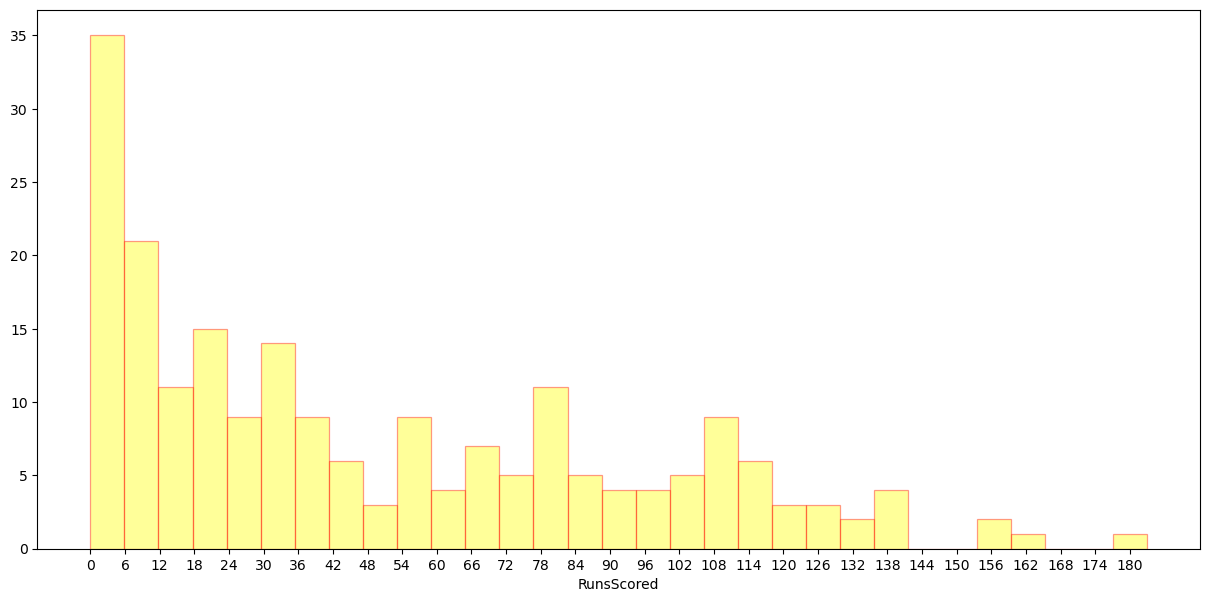

In [143]:
plt.figure(figsize=(15,7))
sns.distplot(mydata["RunsScored"],bins = 31,kde = False, color = neon_red_yellow_palette[2] , hist_kws = {'linewidth' : 0.9,'edgecolor' : neon_red_yellow_palette[3]})
plt.xticks(np.arange(0,182,6)) # This code gives the values for X-Axis with step size of 7 in the range starting from 0 to 182
plt.show()

###### The most frequent runs scored by Virat Kohli falls in the 0-6 runs range, suggesting a number of low scoring innings. This could be indicative of getting out early in several matches.

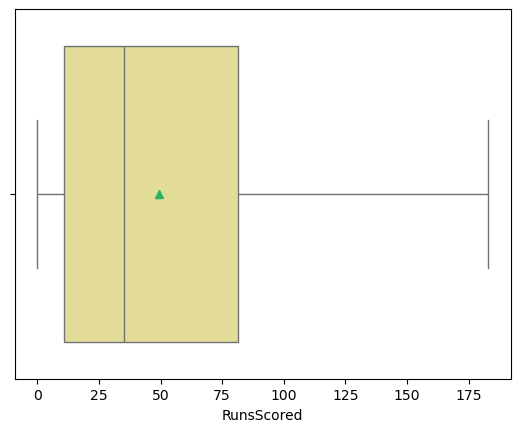

In [47]:
sns.boxplot(x = 'RunsScored',data = mydata, showmeans=True, color = neon_red_yellow_palette[13])
plt.show()

###### Virat Kohli's scores are consistently centered around the 50-run mark, with most of his scores between 25 and 100 runs. This suggests a high level of consistency in his performance, with a tendency to score moderately high innings rather than very low scores or extremely high scores. His scoring distribution is skewed slightly towards higher innings, showing his potential to make significant contributions more often than not.








In [49]:
mydata["RunsScored"].quantile(.25) 

10.75

In [51]:
mydata["RunsScored"].quantile(.75)

81.25

In [53]:
81.25-10.75

70.5

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\469662386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(mydata['Dismissal'], palette  = very_bright_contrasting)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\469662386.py:2: UserWarning: The palette list has more values (18) than needed (7), which may not be intended.
  sns.countplot(mydata['Dismissal'], palette  = very_bright_contrasting)


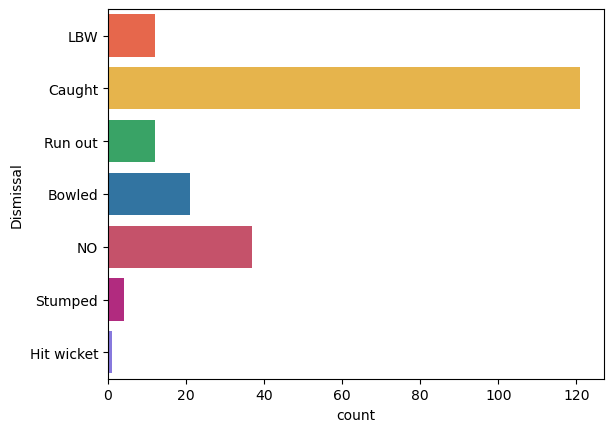

In [59]:
# Count plot of Dismissals
sns.countplot(mydata['Dismissal'], palette  = very_bright_contrasting)
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\1775925713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=mydata['Opposition'],order = mydata['Opposition'].value_counts().index, palette  = very_bright_contrasting[2:14])


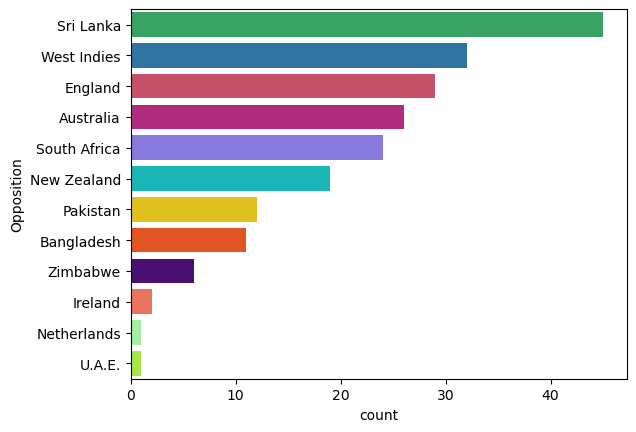

In [61]:
# Countplot of Opposition - horizontally plotted
sns.countplot(y=mydata['Opposition'],order = mydata['Opposition'].value_counts().index, palette  = very_bright_contrasting[2:14])
plt.show()

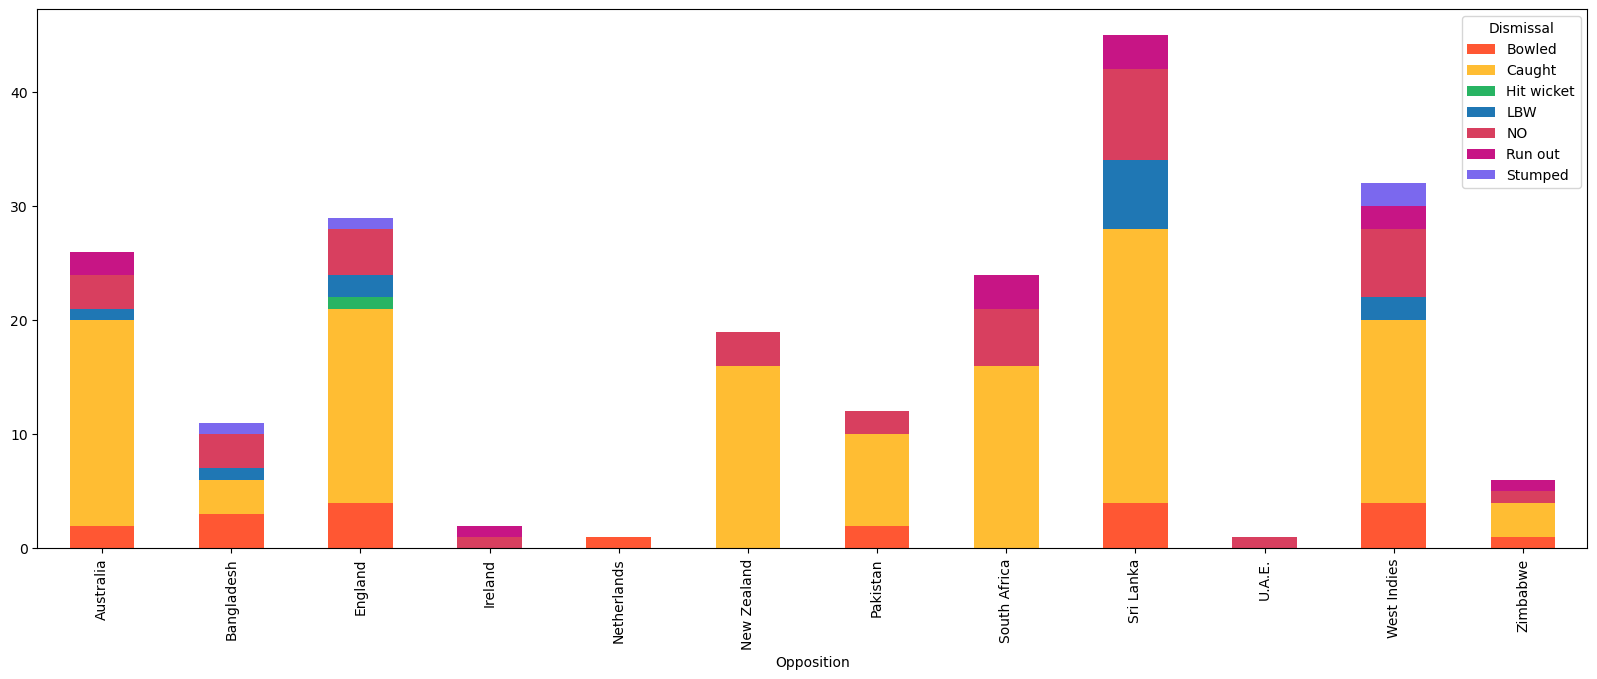

In [63]:
ct = pd.crosstab(mydata['Opposition'],mydata['Dismissal'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (20,7))
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\471619589.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( x='RunsScored', y='Opposition', estimator = np.sum, data=mydata, ci=None, palette  = very_bright_contrasting)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\471619589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x='RunsScored', y='Opposition', estimator = np.sum, data=mydata, ci=None, palette  = very_bright_contrasting)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\471619589.py:2: UserWarning: The palette list has more values (18) than needed (12), which may not be intended.
  sns.barplot( x='RunsScored', y='Opposition', estimator = np.sum, data=mydata, ci=None, palette  = very_bright_contrasting)


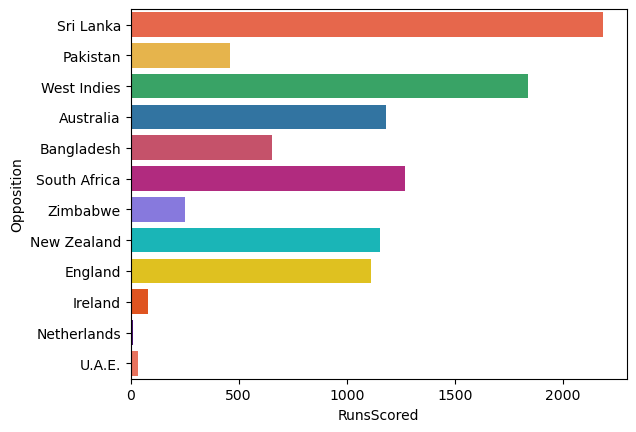

In [67]:
# Bar plot of Total runs scored against each Oppostion
sns.barplot( x='RunsScored', y='Opposition', estimator = np.sum, data=mydata, ci=None, palette  = very_bright_contrasting)

plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\990545390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'RunsScored', y='Opposition', data=mydata, palette  = very_bright_contrasting)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\990545390.py:2: UserWarning: The palette list has more values (18) than needed (12), which may not be intended.
  sns.boxplot(x= 'RunsScored', y='Opposition', data=mydata, palette  = very_bright_contrasting)


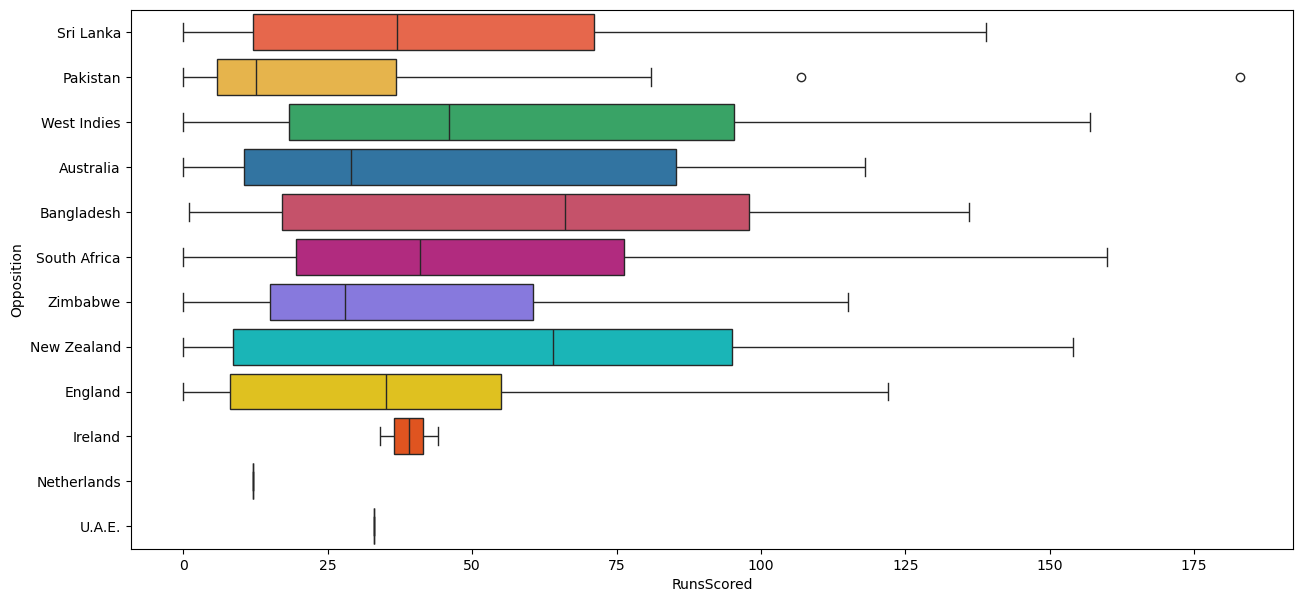

In [71]:
plt.figure(figsize=(15,7))
sns.boxplot(x= 'RunsScored', y='Opposition', data=mydata, palette  = very_bright_contrasting)
plt.show()

In [73]:
mydata[mydata["Opposition"]=="Bangladesh"]["RunsScored"].median() 

66.0

In [75]:
mydata[mydata["Opposition"]=="New Zealand"]["RunsScored"].median() 

64.0

In [77]:
mydata[mydata["Opposition"]=="Sri Lanka"]["RunsScored"].median() 

37.0

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\220061895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RunsScored", y="Inning", data=mydata, orient='h', palette  = very_bright_contrasting)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\220061895.py:1: UserWarning: The palette list has more values (18) than needed (2), which may not be intended.
  sns.boxplot(x="RunsScored", y="Inning", data=mydata, orient='h', palette  = very_bright_contrasting)


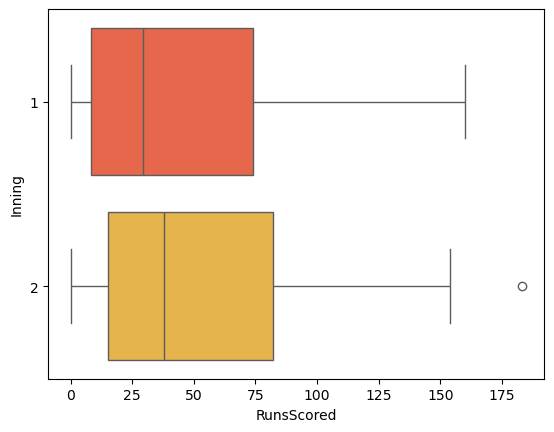

In [81]:
sns.boxplot(x="RunsScored", y="Inning", data=mydata, orient='h', palette  = very_bright_contrasting)
plt.show()

In [83]:
mydata['post_transform'] = mydata["Year"]>2012

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\513914682.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="RunsScored", y="post_transform", data=mydata, orient='h', palette  = very_bright_contrasting[5:10])
C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\513914682.py:1: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(x="RunsScored", y="post_transform", data=mydata, orient='h', palette  = very_bright_contrasting[5:10])


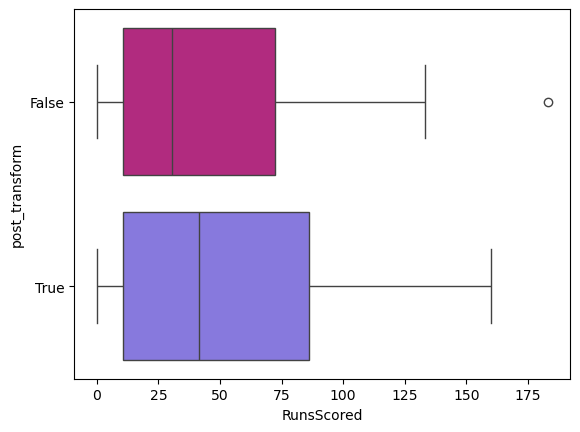

In [93]:
sns.boxplot(x="RunsScored", y="post_transform", data=mydata, orient='h', palette  = very_bright_contrasting[5:10])
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\1268410811.py:1: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(x="RunsScored", y="post_transform",hue='Inning', data=mydata, orient='h', palette  = very_bright_contrasting[1:9])


<Axes: xlabel='RunsScored', ylabel='post_transform'>

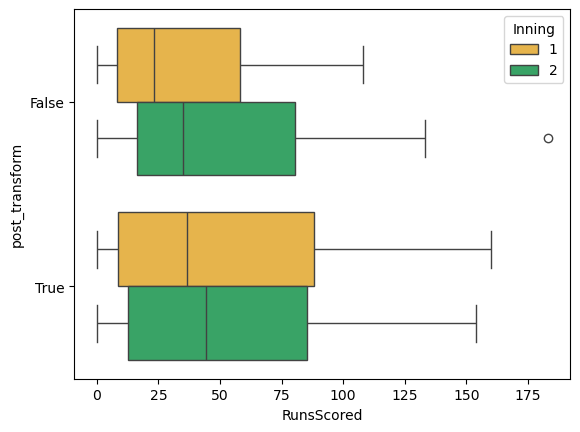

In [99]:
sns.boxplot(x="RunsScored", y="post_transform",hue='Inning', data=mydata, orient='h', palette  = very_bright_contrasting[1:9])

In [101]:
pd.crosstab(index = mydata['post_transform'],columns=mydata['Dismissal'], values=mydata['RunsScored'],margins=True,aggfunc='mean')

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped,All
post_transform,,,,,,,,
False,27.454545,42.000000,107.0,23.750000,82.166667,42.0,16.5,44.159091
True,56.400000,42.397260,NaN,40.000000,80.480000,50.0,107.5,52.883333
All,41.238095,42.239669,107.0,29.166667,81.027027,46.0,62.0,49.192308


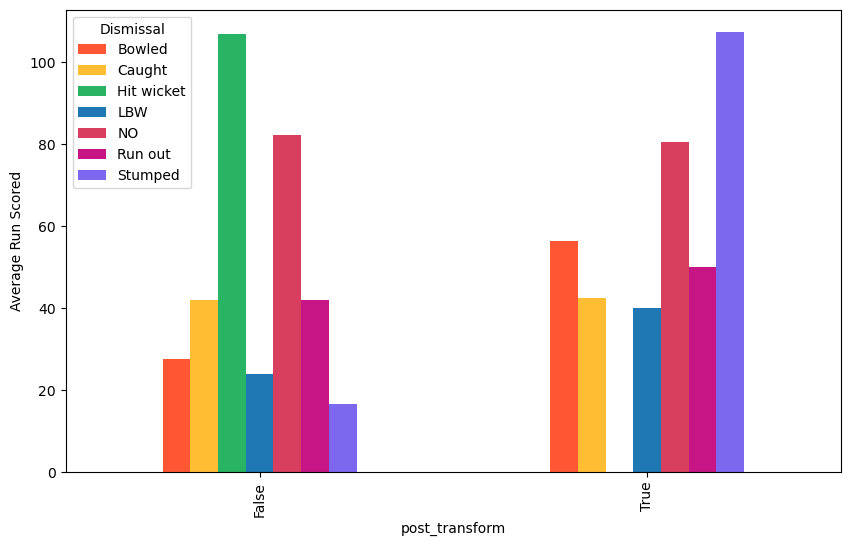

In [103]:
ct = pd.crosstab(index = mydata['post_transform'],columns=mydata['Dismissal'], values=mydata['RunsScored'],margins=True,aggfunc='mean')
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(figsize = (10,6))
plt.ylabel("Average Run Scored")
plt.show()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_16480\1699745233.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Year', y='RunsScored', data=mydata, ci= None)


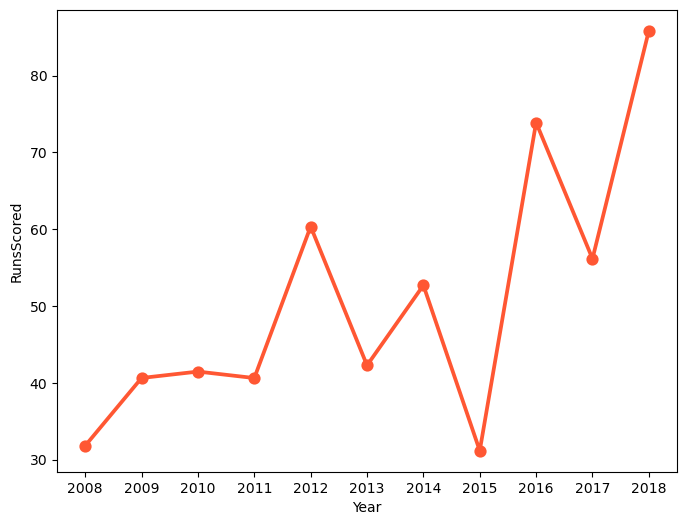

In [121]:
plt.figure(figsize=(8,6))
sns.pointplot(x='Year', y='RunsScored', data=mydata, ci= None)
plt.show()

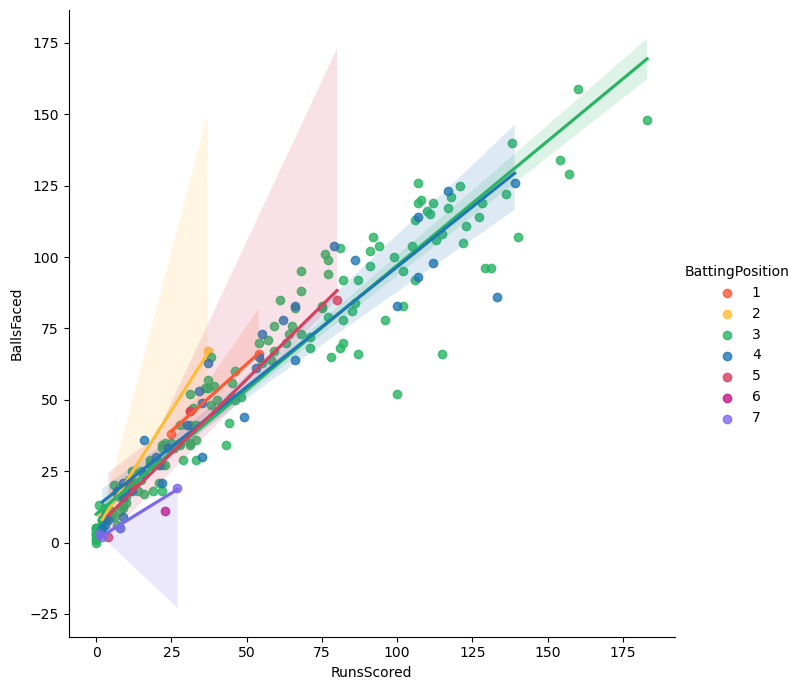

In [123]:
sns.lmplot(x="RunsScored", y="BallsFaced",hue='BattingPosition', data=mydata,height=7)
plt.show()

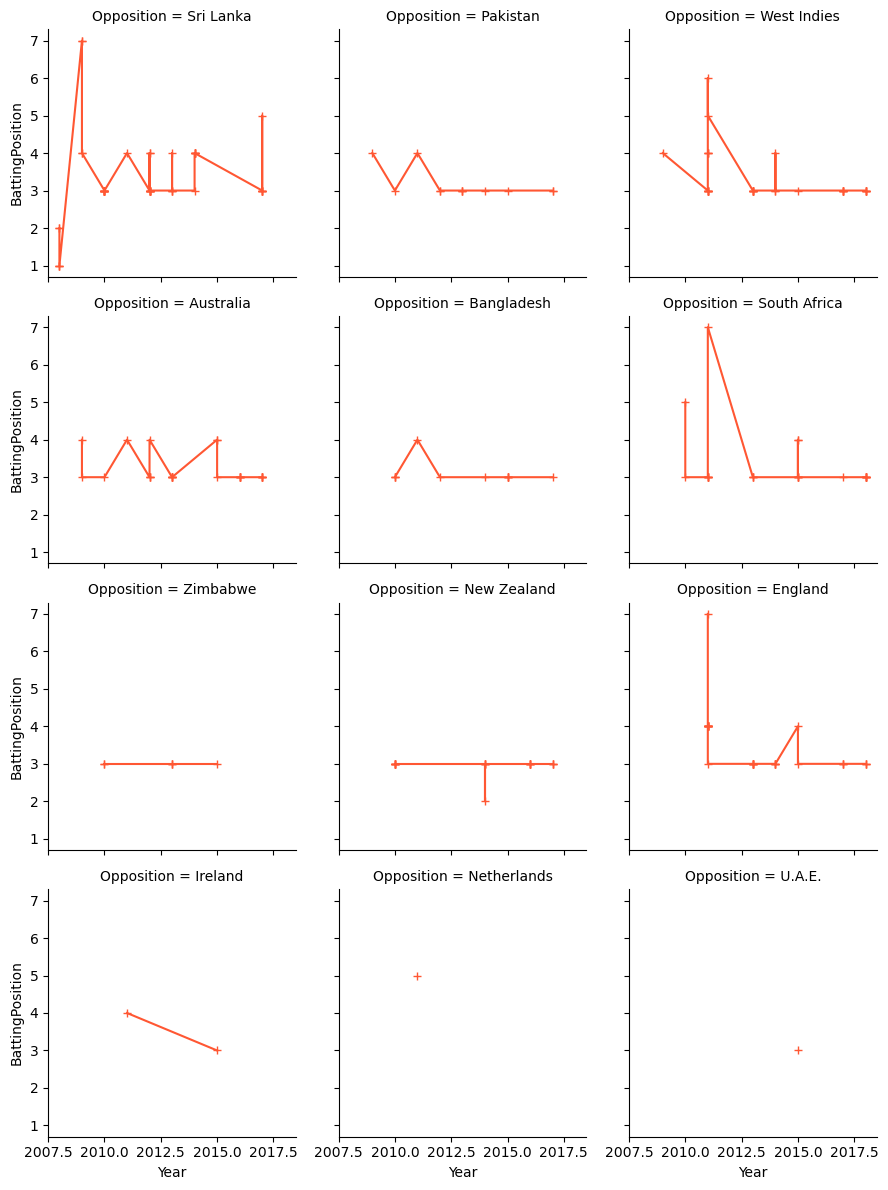

In [129]:
g = sns.FacetGrid(mydata, col="Opposition", col_wrap=3, height=3)
g = g.map(plt.plot, "Year", "BattingPosition", marker="+")
plt.show()